In [19]:
# Import libraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Import the healthcare dataset into a Pandas Dataframe
healthcare_df = pd.read_csv(Path("./Resources/healthcare-dataset-stroke-data.csv"))

# Review the DataFrame
healthcare_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Data Preparation

In [21]:
# Drop the ;id' column
healthcare_df = healthcare_df.drop(['id'],axis=1)

In [22]:
# Checking for null values
healthcare_df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [23]:
# Drop null values, reset dataframe index
healthcare_df = healthcare_df.dropna().reset_index()
healthcare_df = healthcare_df.drop(['index'],axis=1)

In [24]:
healthcare_df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Feature Engineering

In [25]:
# Add a feature for the 'number of risks'
number_of_risks = []

for index, row in healthcare_df.iterrows():
    counter = 0
    if row['avg_glucose_level'] >= 140:
        counter += 1
    if row['heart_disease'] == 1:
        counter += 1
    if row['hypertension'] == 1:
        counter += 1
    if row['smoking_status'] == 'smokes' or row['smoking_status'] == 'formerly smoked':
        counter += 1
    if row['bmi']>25:
        counter += 1
        
    number_of_risks.append(counter)

healthcare_df["number_of_risks"] = number_of_risks

healthcare_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,number_of_risks
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,4
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,2
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,3
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,2
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,3


# Data Visualization

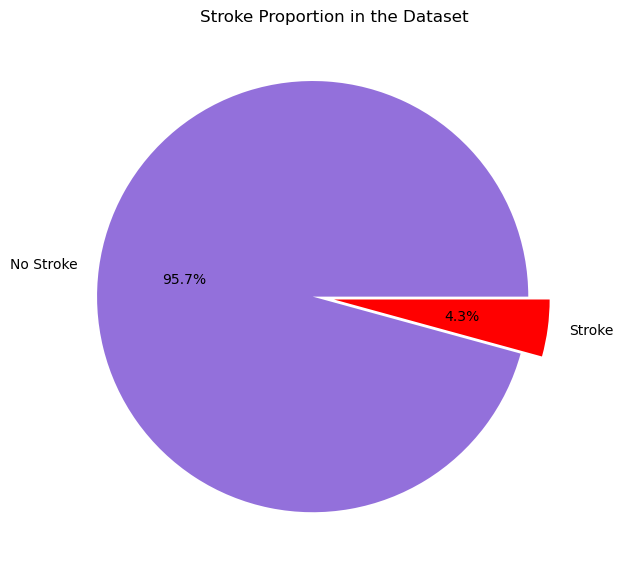

In [153]:
# Proportion of stroke samples
labels = ['No Stroke', 'Stroke']
sizes = healthcare_df['stroke'].value_counts(sort = True)
colors = ["mediumpurple","red"]
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=(0.1,0), labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Stroke Proportion in the Dataset')
plt.savefig('./Images/stroke_proportion.png')
plt.show()

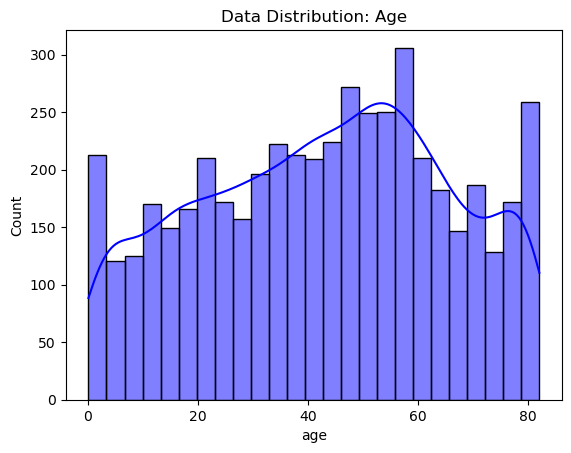

In [150]:
# Distribution of ages in the dataset
sns.histplot(healthcare_df['age'], color='blue', kde = True, bins = 25).set(title = "Data Distribution: Age")
plt.savefig('./Images/age_distribution.png')

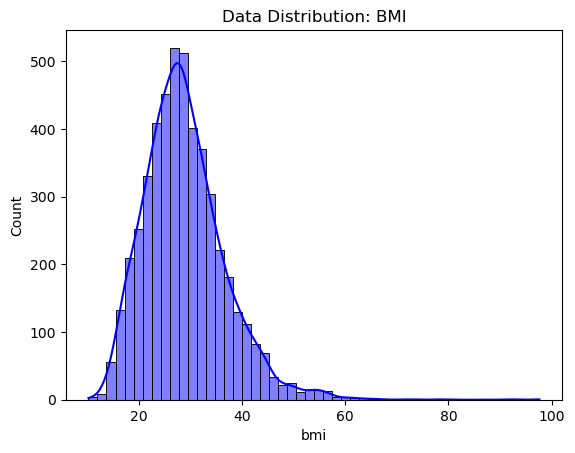

In [151]:
# Distribution of bmi levels in the dataset
sns.histplot(healthcare_df['bmi'], color='blue', kde = True, bins = 50).set(title = "Data Distribution: BMI")
plt.savefig('./Images/bmi_distribution.png')

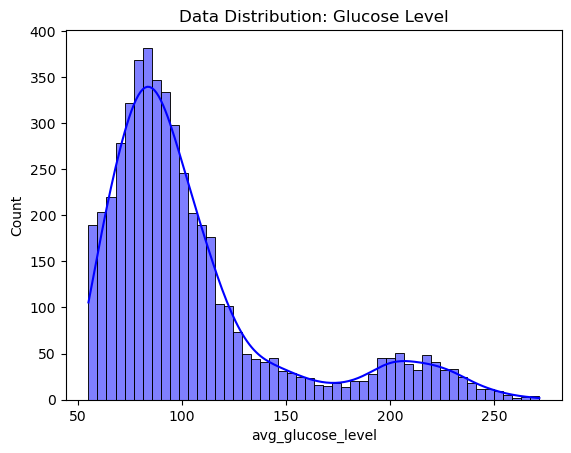

In [152]:
# Distribution of glucose levels in the dataset
sns.histplot(healthcare_df['avg_glucose_level'], color='blue', kde = True, bins = 50).set(title = "Data Distribution: Glucose Level")
plt.savefig('./Images/glucose_distribution.png')

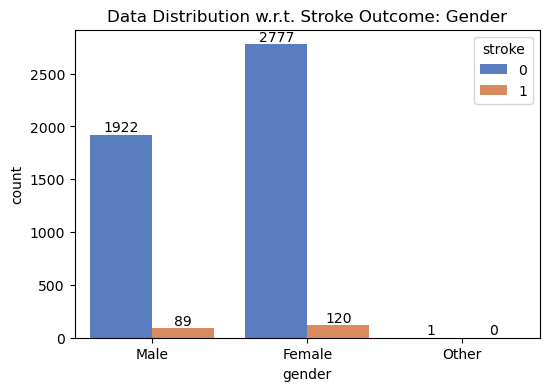

In [154]:
# Visualizing gender categorical data
plt.figure(figsize=(6,4))
gender_visual = sns.countplot(x= 'gender', hue = 'stroke', data = healthcare_df, palette = 'muted')
for container in gender_visual.containers:
    gender_visual.bar_label(container)
gender_visual.set(title = "Data Distribution w.r.t. Stroke Outcome: Gender")
plt.savefig('./Images/gender_visual.png')

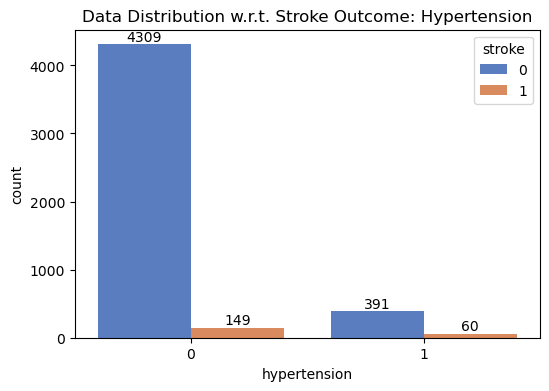

In [155]:
# Visualizing hypertension categorical data
plt.figure(figsize=(6,4))
hypertension_visual = sns.countplot(x= 'hypertension', hue = 'stroke', data = healthcare_df, palette = 'muted')
for container in hypertension_visual.containers:
    hypertension_visual.bar_label(container)
hypertension_visual.set(title = "Data Distribution w.r.t. Stroke Outcome: Hypertension")
plt.savefig('./Images/hypertension_visual.png')

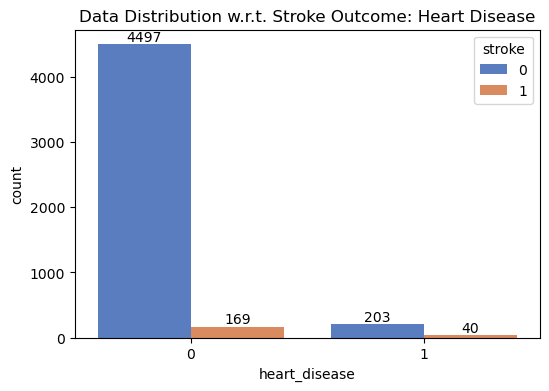

In [156]:
# Visualizing heart disease categorical data
plt.figure(figsize=(6,4))
heart_disease_visual = sns.countplot(x= 'heart_disease', hue = 'stroke', data = healthcare_df, palette = 'muted')
for container in heart_disease_visual.containers:
    heart_disease_visual.bar_label(container)
heart_disease_visual.set(title = "Data Distribution w.r.t. Stroke Outcome: Heart Disease")
plt.savefig('./Images/heart_disease_visual.png')

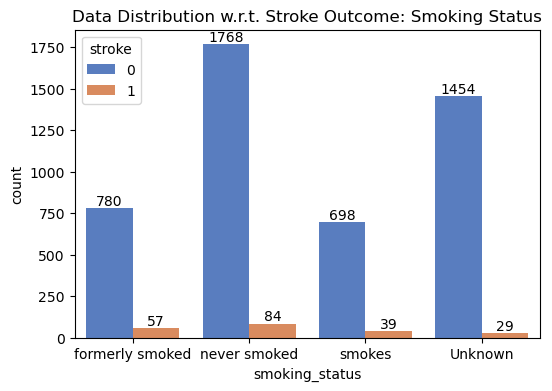

In [157]:
# Visualizing smoking status categorical data
plt.figure(figsize=(6,4))
smoking_visual = sns.countplot(x = 'smoking_status', hue ='stroke', data = healthcare_df, palette='muted')
for container in smoking_visual.containers:
    smoking_visual.bar_label(container)
smoking_visual.set(title = "Data Distribution w.r.t. Stroke Outcome: Smoking Status")
plt.savefig('./Images/smoking_visual.png')

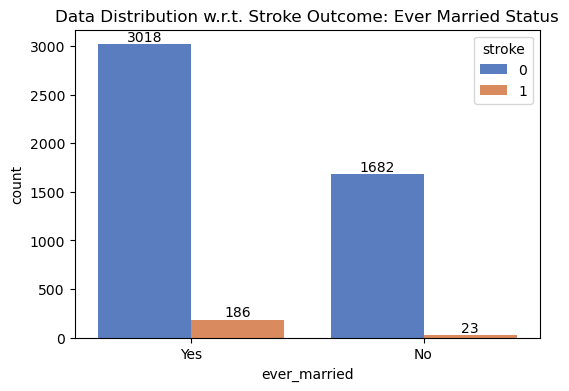

In [158]:
# Visualizing marriage status categorical data
plt.figure(figsize=(6,4))
marriage_visual = sns.countplot(x = 'ever_married', hue ='stroke', data = healthcare_df, palette='muted')
for container in marriage_visual.containers:
    marriage_visual.bar_label(container)
marriage_visual.set(title = "Data Distribution w.r.t. Stroke Outcome: Ever Married Status")
plt.savefig('./Images/marriage_visual.png')

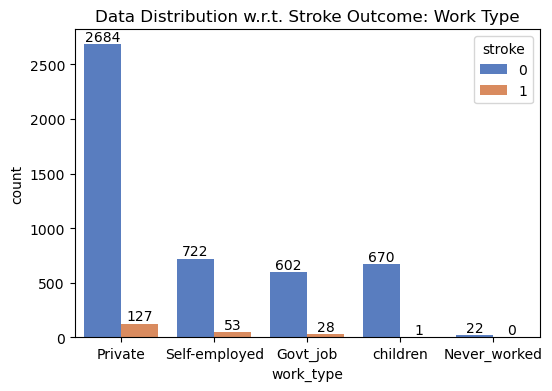

In [159]:
# Visualizing work type categorical data
plt.figure(figsize=(6,4))
work_visual = sns.countplot(x = 'work_type', hue ='stroke', data = healthcare_df, palette='muted')
for container in work_visual.containers:
    work_visual.bar_label(container)
work_visual.set(title = "Data Distribution w.r.t. Stroke Outcome: Work Type")
plt.savefig('./Images/work_visual.png')

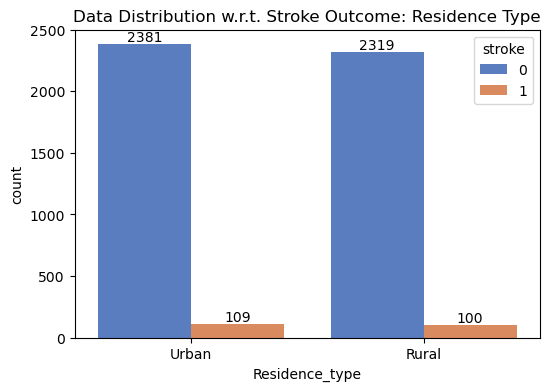

In [160]:
# Visualizing residence type categorical data
plt.figure(figsize=(6,4))
residence_visual = sns.countplot(x = 'Residence_type', hue ='stroke', data = healthcare_df, palette='muted')
for container in residence_visual.containers:
    residence_visual.bar_label(container)
residence_visual.set(title = "Data Distribution w.r.t. Stroke Outcome: Residence Type")
plt.savefig('./Images/residence_visual.png')

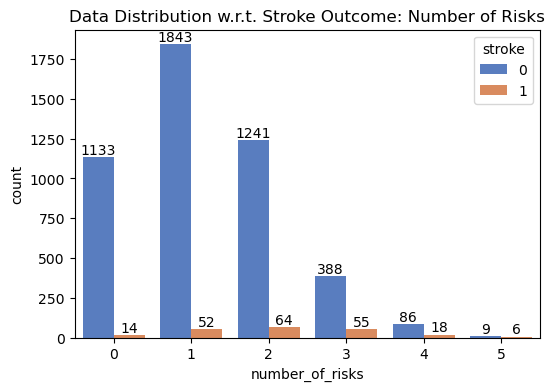

In [161]:
# Visualizing number of risks categorical data
plt.figure(figsize=(6,4))
risk_visual = sns.countplot(x = 'number_of_risks', hue ='stroke', data = healthcare_df, palette='muted')
for container in risk_visual.containers:
    risk_visual.bar_label(container)
risk_visual.set(title = "Data Distribution w.r.t. Stroke Outcome: Number of Risks")
plt.savefig('./Images/risk_visual.png')

# Machine Learning Data Preparation

In [163]:
#convert categorical data
#create encoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse_output=False)

In [164]:
healthcare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4909 entries, 0 to 4908
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
 11  number_of_risks    4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 460.3+ KB


In [165]:
list(healthcare_df.dtypes[healthcare_df.dtypes == "object"].index)

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [166]:
# Create a list of the columns with categorical variables plus 'number_of_risks'
categorical_variables = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'number_of_risks']

# Use the fit_transform method from the OneHotEncoder to encode the data
encoded_data = enc.fit_transform(healthcare_df[categorical_variables])

In [167]:
 # Create a DataFrame with the encoded variables
encoded_df = pd.DataFrame(encoded_data, columns = enc.get_feature_names_out(categorical_variables))

# Display sample data
encoded_df.head()

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,...,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,number_of_risks_0,number_of_risks_1,number_of_risks_2,number_of_risks_3,number_of_risks_4,number_of_risks_5
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [168]:
# Create a DataFrame with the columnns containing numerical variables from the original dataset
numerical_variables_df = healthcare_df.drop(columns = categorical_variables)

# Review the DataFrame
numerical_variables_df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
1,80.0,0,1,105.92,32.5,1
2,49.0,0,0,171.23,34.4,1
3,79.0,1,0,174.12,24.0,1
4,81.0,0,0,186.21,29.0,1


In [169]:
# Using the Pandas concat function, combine the DataFrames the contain the encoded categorical data and the numerical data
healthcare_encoded = pd.concat([numerical_variables_df, encoded_df], axis=1)

healthcare_encoded.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,number_of_risks_0,number_of_risks_1,number_of_risks_2,number_of_risks_3,number_of_risks_4,number_of_risks_5
0,67.0,0,1,228.69,36.6,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,80.0,0,1,105.92,32.5,1,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,49.0,0,0,171.23,34.4,1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,79.0,1,0,174.12,24.0,1,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,81.0,0,0,186.21,29.0,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [170]:
#Seperate Target
X = healthcare_encoded.drop(columns = "stroke")
y = healthcare_encoded["stroke"]

In [171]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

display(y_train.value_counts())

0    3530
1     151
Name: stroke, dtype: int64

In [172]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [173]:
# Import SMOTEENN from imblearn
from imblearn.combine import SMOTEENN

# Instantiate an instance of the SMOTEENN model
smote_enn = SMOTEENN(random_state=1)

# Fit the SMOTEENN model to the training data
X_resampled, y_resampled = smote_enn.fit_resample(X_train_scaled, y_train)


display(y_resampled.value_counts())

1    3436
0    3037
Name: stroke, dtype: int64

# Logistic Regression Model

In [174]:
# Declare a logistic regression model.
# Apply a random_state of 1 to the 
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(random_state=1)

# Fit and save the logistic regression model using the training data
lr_model = logistic_regression_model.fit(X_resampled, y_resampled)

In [175]:
 #Generate training predictions
training_predictions = lr_model.predict(X_resampled)

#Generate testing predictions
testing_predictions = logistic_regression_model.predict(X_test_scaled)

In [176]:
from sklearn.metrics import confusion_matrix

# Create and save the confustion matrix for the training data
training_matrix = confusion_matrix(y_resampled, training_predictions)

# Print the confusion matrix for the training data
print(training_matrix)

[[2343  694]
 [ 467 2969]]


In [177]:
# Create and save the training classifiction report
from sklearn.metrics import classification_report
testing_report = classification_report(y_test, testing_predictions)
# Print the training classification report
print(testing_report)

              precision    recall  f1-score   support

           0       0.99      0.69      0.82      1170
           1       0.12      0.86      0.22        58

    accuracy                           0.70      1228
   macro avg       0.56      0.78      0.52      1228
weighted avg       0.95      0.70      0.79      1228



In [178]:
# Save Logistic Regression Model
import joblib

joblib.dump(lr_model, 'lr_stroke_model.pkl')

['lr_stroke_model.pkl']

# Random Forest Classifier

In [179]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Fit random forest on resampled data
model_RFC_resampled = RandomForestClassifier()
model_RFC_resampled.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [180]:
# Generate predictions based on the resampled data model
y_pred_RFC_resampled = model_RFC_resampled.predict(X_test_scaled)

In [181]:
# Print classification reports
print(classification_report(y_test, y_pred_RFC_resampled))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1170
           1       0.08      0.12      0.09        58

    accuracy                           0.89      1228
   macro avg       0.52      0.52      0.52      1228
weighted avg       0.91      0.89      0.90      1228



# Support Vector Machine Classifier

In [182]:
# Support vector machine linear classifier
from sklearn.svm import SVC

model_SVM_resampled = SVC(kernel='rbf') #'rbf' is the default (higher dimensions)
model_SVM_resampled.fit(X_resampled, y_resampled)

SVC()

In [183]:
# Generate predictions based on the resampled data model
y_pred_SVM_resampled = model_SVM_resampled.predict(X_test_scaled)

In [184]:
# Print classification reports
print(classification_report(y_test, y_pred_SVM_resampled))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      1170
           1       0.10      0.41      0.16        58

    accuracy                           0.79      1228
   macro avg       0.53      0.61      0.52      1228
weighted avg       0.92      0.79      0.85      1228



# Decision Tree Classifier

In [185]:
from sklearn import tree

# Creating the decision tree classifier instance
model_DTC_resampled = tree.DecisionTreeClassifier(random_state = 1)
model_DTC_resampled = model_DTC_resampled.fit(X_resampled, y_resampled)

In [186]:
# Making predictions using the testing data
y_pred_DTC_resampled = model_DTC_resampled.predict(X_test_scaled)

In [187]:
# Displaying classification report
print(classification_report(y_test, y_pred_DTC_resampled))

              precision    recall  f1-score   support

           0       0.97      0.89      0.92      1170
           1       0.14      0.36      0.20        58

    accuracy                           0.86      1228
   macro avg       0.55      0.62      0.56      1228
weighted avg       0.93      0.86      0.89      1228



# KNN Classifier

In [188]:
from sklearn.neighbors import KNeighborsClassifier

model_KNN_resampled = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
model_KNN_resampled = model_KNN_resampled.fit(X_resampled, y_resampled)

In [189]:
y_pred_KNN_resampled = model_KNN_resampled.predict(X_test_scaled)

In [190]:
print(classification_report(y_test, y_pred_KNN_resampled))

              precision    recall  f1-score   support

           0       0.96      0.84      0.89      1170
           1       0.09      0.31      0.13        58

    accuracy                           0.81      1228
   macro avg       0.52      0.57      0.51      1228
weighted avg       0.92      0.81      0.86      1228



# Stacking Classifier

In [191]:
from sklearn.ensemble import StackingClassifier
models= [("DecisionTree",model_DTC_resampled), ("SupportVector", model_SVM_resampled), ("RandomForest",model_RFC_resampled), ("KNN",model_KNN_resampled)]
stc_clf= StackingClassifier(estimators=models, final_estimator= lr_model, cv = 10)
stc_clf.fit(X_resampled, y_resampled)



StackingClassifier(cv=10,
                   estimators=[('DecisionTree',
                                DecisionTreeClassifier(random_state=1)),
                               ('SupportVector', SVC()),
                               ('RandomForest', RandomForestClassifier()),
                               ('KNN', KNeighborsClassifier())],
                   final_estimator=LogisticRegression(random_state=1))

In [192]:
y_pred_stc_clf = stc_clf.predict(X_test_scaled)

print(classification_report(y_test, y_pred_stc_clf))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1170
           1       0.09      0.19      0.12        58

    accuracy                           0.87      1228
   macro avg       0.52      0.55      0.53      1228
weighted avg       0.92      0.87      0.89      1228



# Try a Neural Network

In [193]:
#Import tensorflow
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import numpy as np

In [194]:
 # Define the the number of inputs (features) to the model
number_input_features = X_resampled.shape[1]

# Define the number of hidden nodes for the first hidden layer
# Use the mean of the number of input features plus the number of output nurons
# Use the Python floor division (//) to return the quotent
hidden_nodes_layer1 =  (number_input_features + 1) // 2 

# Define the number of hidden nodes for the second hidden layer
# Use the mean of the number of hidden nodes in the first hidden layer plus the number of output nurons
# Use the Python floor division (//) to return the quotent
hidden_nodes_layer2 = (hidden_nodes_layer1 + 1) // 2

# Create the Sequential model instance
nn = Sequential()

# Add the first hidden layer specifying the number of inputs, the number of hidden nodes, and the activation function
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Add the second hidden layer specifying the number of hidden nodes and the activation function
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn.add(Dense(units=1, activation="sigmoid"))

In [195]:
 # Display the Sequential model summary
nn.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                392       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 505 (1.97 KB)
Trainable params: 505 (1.97 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [196]:
# Compile the Sequential model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [197]:
# Fit the model using 100 epochs and the training data
fit_model = nn.fit(X_resampled, y_resampled, epochs=100)

Epoch 1/100
203/203 [==============================] - 1s 1ms/step - loss: 0.5314 - accuracy: 0.7452
Epoch 2/100
203/203 [==============================] - 0s 930us/step - loss: 0.3983 - accuracy: 0.8191
Epoch 3/100
203/203 [==============================] - 0s 927us/step - loss: 0.3451 - accuracy: 0.8433
Epoch 4/100
203/203 [==============================] - 0s 967us/step - loss: 0.3169 - accuracy: 0.8627
Epoch 5/100
203/203 [==============================] - 0s 1ms/step - loss: 0.2963 - accuracy: 0.8696
Epoch 6/100
203/203 [==============================] - 0s 1ms/step - loss: 0.2798 - accuracy: 0.8775
Epoch 7/100
203/203 [==============================] - 0s 912us/step - loss: 0.2656 - accuracy: 0.8888
Epoch 8/100
203/203 [==============================] - 0s 974us/step - loss: 0.2558 - accuracy: 0.8936
Epoch 9/100
203/203 [==============================] - 0s 970us/step - loss: 0.2458 - accuracy: 0.9044
Epoch 10/100
203/203 [==============================] - 0s 924us/step - loss: 0

In [198]:
 # Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy= nn.evaluate(X_test_scaled,y_test,verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

39/39 - 0s - loss: 1.1473 - accuracy: 0.8314 - 140ms/epoch - 4ms/step
Loss: 1.1473459005355835, Accuracy: 0.8314332365989685


In [199]:
y_pred_nn = (nn.predict(X_test_scaled) > 0.2).astype("int32")

print(classification_report(y_test, y_pred_nn))

39/39 [==============================] - 0s 724us/step
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      1170
           1       0.09      0.33      0.14        58

    accuracy                           0.81      1228
   macro avg       0.52      0.58      0.51      1228
weighted avg       0.92      0.81      0.85      1228



# Visualizing Model Performance

In [207]:
from sklearn.metrics import recall_score


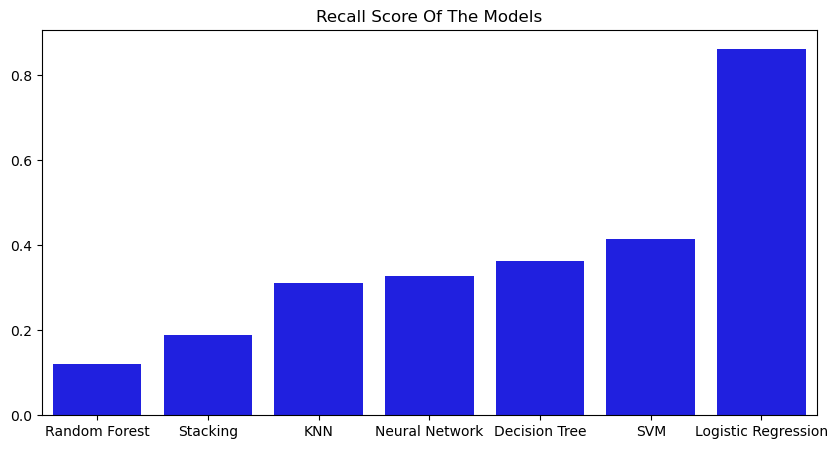

In [208]:
SVM_recall = recall_score(y_test,y_pred_SVM_resampled)
ST_recall = recall_score(y_test, y_pred_stc_clf)
KNN_recall = recall_score(y_test, y_pred_KNN_resampled)
DT_recall = recall_score(y_test, y_pred_DTC_resampled)
RF_recall = recall_score(y_test,y_pred_RFC_resampled )
NN_recall = recall_score(y_test, y_pred_nn)
LR_recall = recall_score(y_test, testing_predictions)

plt.figure(figsize=(10,5))
sns.barplot(x =['Random Forest', 'Stacking', 'KNN', 'Neural Network', 'Decision Tree', 'SVM', 'Logistic Regression'],
            y=[RF_recall, ST_recall, KNN_recall, NN_recall, DT_recall, SVM_recall, LR_recall] , color='blue').set(title = "Recall Score Of The Models")
plt.savefig('./Images/model_performance.png')